In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

### Read csv

In [228]:
df = pd.read_csv("car_data.csv")

### Linear regression equation for mileage vs price

In [229]:
x = df[["Mileage"]]
y = df[["Price"]]
lm = linear_model.LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [238]:
mileage_x, test_x, mileage_y, test_y = train_test_split(x, y, random_state=101)

In [259]:
print(lm.intercept_)
print(lm.coef_)
print("full: ", lm.score(x, y))
print("portion: ", lm.score(mileage_x, mileage_y))
print("test: ", lm.score(test_x, test_y))

[ 24764.55900606]
[[-0.1725205]]
full:  0.0204634473235
portion:  0.0257593300669
test:  0.0011461297165


In [364]:
# scores = []
# for deg in range(5):
#     model = Pipeline([
#     ('poly', PolynomialFeatures(degree=3)),
#     ('linear', LinearRegression(fit_intercept=False))])
#     model.fit(mileage_x, mileage_y)
#     plt.scatter(train_X, train_y)
#     x_vals = np.arange(0,100,1).reshape(-1,1)
#     plt.plot(x_vals,model.predict(x_vals))
#     scores.append(model.score(train_X,train_y))

### Portion of mileage vs price (604 entries)

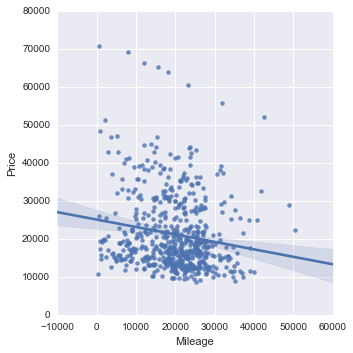

In [260]:
df1 = pd.DataFrame(mileage_x)
df1 = df1.join(mileage_y)
sns.lmplot("Mileage", "Price", data=df1, fit_reg=True)

### Mileage vs Price (Full Data)

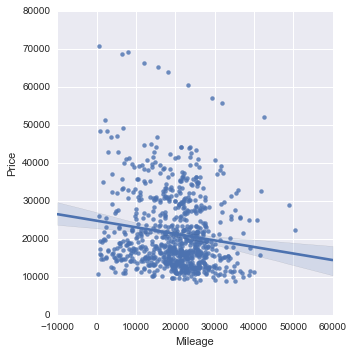

In [21]:
sns.lmplot("Mileage", "Price", data=df, fit_reg=True)

### Get intercept and correlation coefficient

In [51]:
print("cylinder")
print(lm_cylinder_price.intercept_)
print(lm_cylinder_price.coef_, "\n")

print("liter")
print(lm_liter_price.intercept_)
print(lm_liter_price.coef_, "\n")

print("door")
print(lm_door_price.intercept_)
print(lm_door_price.coef_, "\n")

print("cruise")
print(lm_cruise_price.intercept_)
print(lm_cruise_price.coef_, "\n")

print("sound")
print(lm_sound_price.intercept_)
print(lm_sound_price.coef_, "\n")

print("leather")
print(lm_leather_price.intercept_)
print(lm_leather_price.coef_, "\n")

cylinder
[-17.05748707]
[[ 4054.20250438]] 

liter
[ 6185.75468278]
[[ 4990.39345781]] 

door
[ 27033.60029005]
[[-1613.23238515]] 

cruise
[ 13921.86566691]
[[ 9862.32659956]] 

sound
[ 23130.14437939]
[[-2631.40749469]] 

leather
[ 18828.77592762]
[[ 3473.4566033]] 



In [115]:
# feature_cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

# Cylinder
lm_cylinder_price = linear_model.LinearRegression()
x1 = df[['Cylinder']][:704]
y1 = df[['Price']][:704]
test_x1 = df[['Cylinder']][100:]
test_y1 = df[['Price']][100:]

lm_cylinder_price.fit(x1, y1)
print("cylinder: ", lm_cylinder_price.score(x1, y1))
print("cylinder test: ", lm_cylinder_price.score(test_x1, test_y1))

# Liter
lm_liter_price = linear_model.LinearRegression()
x2 = df[['Liter']][:704]
y2 = df[['Price']][:704]
test_x2 = df[['Liter']][100:]
test_y2 = df[['Price']][100:]

lm_liter_price.fit(x2, y2)
print("liter: ", lm_liter_price.score(x2, y2))
print("liter test: ", lm_liter_price.score(test_x2, test_y2))

# Doors
lm_door_price = linear_model.LinearRegression()
x3 = df[['Doors']][:704]
y3 = df[['Price']][:704]
test_x3 = df[['Doors']][100:]
test_y3 = df[['Price']][100:]

lm_door_price.fit(x3, y3)
print("door: ", lm_door_price.score(x3, y3))
print("door test: ", lm_door_price.score(test_x3, test_y3))

# Cruise
lm_cruise_price = linear_model.LinearRegression()
x4 = df[['Cruise']][:704]
y4 = df[['Price']][:704]
test_x4 = df[['Cruise']][100:]
test_y4 = df[['Price']][100:]

lm_cruise_price.fit(x4, y4)
print("cruise: ", lm_cruise_price.score(x4, y4))
print("cruise test: ", lm_cruise_price.score(test_x4, test_y4))

# Sound
lm_sound_price = linear_model.LinearRegression()
x5 = df[['Sound']][:704]
y5 = df[['Price']][:704]
test_x5 = df[['Sound']][100:]
test_y5 = df[['Price']][100:]

lm_sound_price.fit(x5, y5)
print("sound: ", lm_sound_price.score(x5, y5))
print("sound test: ", lm_sound_price.score(test_x5, test_y5))

# Leather
lm_leather_price = linear_model.LinearRegression()
x6 = df[['Leather']][:704]
y6 = df[['Price']][:704]
test_x6 = df[['Leather']][100:]
test_y6 = df[['Price']][100:]

lm_leather_price.fit(x6, y6)
print("leather: ", lm_leather_price.score(x6, y6))
print("leather test: ", lm_leather_price.score(test_x6, test_y6))

cylinder:  0.375198970085
cylinder test:  0.297440690846
liter:  0.338360008414
liter test:  0.290316711524
door:  0.0344187061448
door test:  0.0240203102837
cruise:  0.168414954682
cruise test:  0.191701668974
sound:  0.0258884996888
sound test:  0.0110705247706
leather:  0.01420435145
leather test:  0.0171496457798


In [116]:
feature_cols = ['Cylinder', 'Liter',]
lm_cyli_price = linear_model.LinearRegression()
x7 = df[feature_cols]
lm_cyli_price.fit(x7, y)
print("cylinder and liter: ", lm_cyli_price.score(x7, y))

cylinder and liter:  0.325915516016


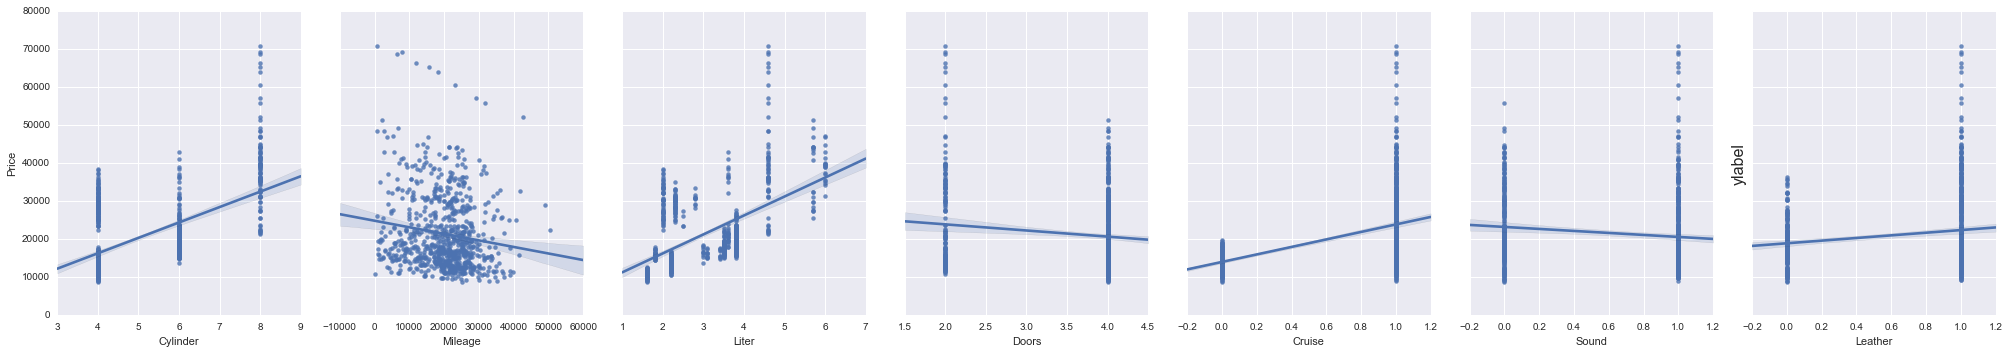

In [294]:
sns.pairplot(df, x_vars=['Cylinder', 'Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], y_vars=["Price"],
             size=5, aspect=.8, kind="reg")
plt.ylabel('ylabel', fontsize=16)
plt.tight_layout()
plt.show()

## Create dummy variables for make, model and type

In [200]:
dummy_make = pd.get_dummies(df['Make'])
dummy_model = pd.get_dummies(df['Model'])
dummy_type = pd.get_dummies(df['Type'])

In [277]:
frame_make = df[['Price']]
frame_model = df[['Price']]
frame_type = df[['Price']]

data_make = frame_make.join(dummy_make)
data_model = frame_model.join(dummy_model)
data_type = frame_type.join(dummy_type)

In [286]:
dummy_make.head()

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [282]:
lm_type = linear_model.LinearRegression()
lm_type.fit(data_type[['Price']], dummy_type)
print(lm_type.score(data_type[['Price']], dummy_type))

lm_make = linear_model.LinearRegression()
lm_make.fit(data_type[['Price']], data_make)
print(lm_make.score(data_type[['Price']], data_make))

lm_model = linear_model.LinearRegression()
lm_model.fit(data_type[['Price']], data_model)
print(lm_model.score(data_type[['Price']], data_model))

0.0386077081636
0.999999993204
0.999999990525


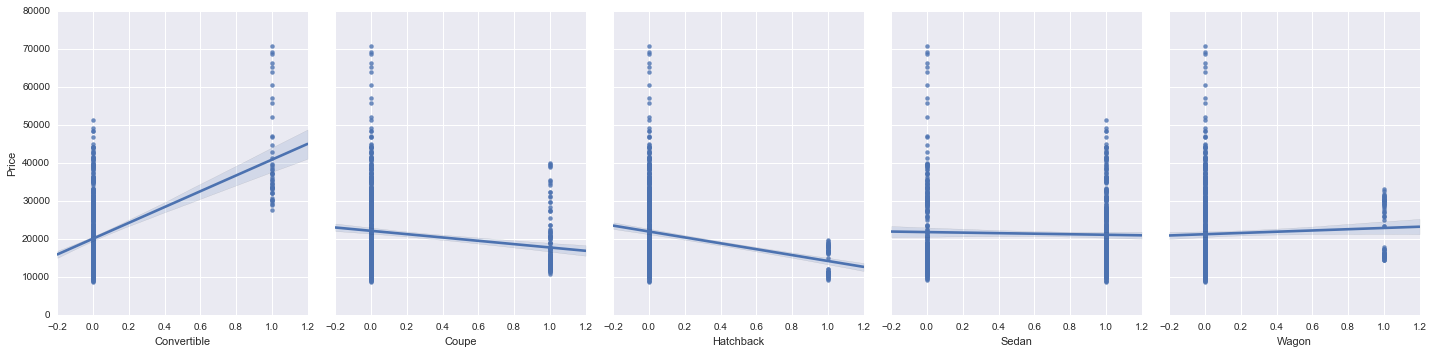

In [284]:
sns.pairplot(data_type, x_vars=['Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'], y_vars=["Price"],
             size=5, aspect=.8, kind="reg")
plt.tight_layout()
plt.show()

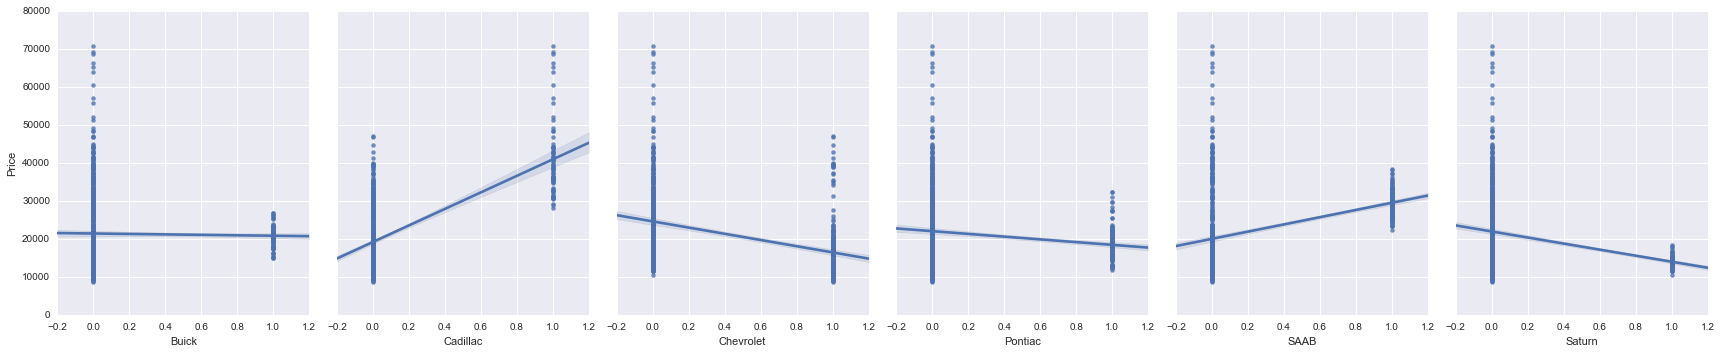

In [287]:
sns.pairplot(data_make, x_vars=['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'], y_vars=["Price"],
             size=5, aspect=.8, kind="reg")
plt.tight_layout()
plt.show()

In [351]:
# lm_test = linear_model.LinearRegression()
# x8 = data_type[['Sedan']][:704]
# y8 = data_type[['Price']][:704]
# test_x8 = data_type[['Sedan']][100:]
# test_y8 = data_type[['Price']][100:]

# lm_test.fit(x8, y8)
# print("Sedan: ", lm_test.score(test_x8, test_y8))

In [352]:
# df_cadillac = df[df['Make'] == 'Cadillac']
# frame_cadillac = df[['Price']]

In [353]:
# dummy_cadillac = pd.get_dummies(df_cadillac['Type'])
# data_cadillac = dummy_cadillac.join(frame_cadillac)

In [354]:
# lm_cadillac = linear_model.LinearRegression()
# lm_cadillac.fit(data_cadillac[['Price']], data_cadillac)
# print(lm_cadillac.score(data_cadillac[['Price']], data_cadillac))